Date: 7/18/2022
Author: Hoang Van Phan

Here I will analyze Ye lab's scRNA-seq lupus data. The annotated h5ad object was downloaded from cellxgene: https://cellxgene.cziscience.com/collections/436154da-bcf1-4130-9c8b-120ff9a888f2

**NOTE:** The object is too big to analyze on a personal laptop.

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import scanpy as sc
sc.settings.verbosity = 3
sc.logging.print_version_and_date()
import scanpy.external as sce

Running Scanpy 1.9.1, on 2022-07-19 11:10.


In [2]:
# Figure settings
mpl.rcdefaults()
# Set font to be arial
mpl.rc('font', **{'sans-serif':'Arial', 'size':12})
mpl.rcParams['mathtext.rm'] = 'sans' # to have non-italic greek letter, use r'$\mathrm{\alpha}$', does NOT work with f-string
mpl.rcParams['axes.titlesize'] = 12
# Set default tick size
mpl.rcParams['xtick.major.size'] = 5.5
mpl.rcParams['ytick.major.size'] = 5.5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['ytick.minor.size'] = 2.5
# Default legend settings
mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.edgecolor'] = 'k'

# sc.settings.set_figure_params(dpi=120)

In [5]:
# Load donor IDs of lupus patients
donor_id = pd.read_excel(
    "/home/lab/Van/20220715_CLUES_lupus/"
    + "CLUES_metadata_stress_7.14.22_simplified_subjectid_only.xlsx")
donor_id.head()

,subjectid
0,2061
1,1014
2,1523
3,1132
4,1420


In [6]:
# Load data
adata = sc.read_h5ad(
    "/home/lab/Van/20220715_CLUES_lupus/objects/"
    + "Ye_lab_annotated_cellxgene.h5ad")
adata

AnnData object with n_obs × n_vars = 1263676 × 30933
    obs: 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'author_cluster', 'sample_uuid', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'disease_state', 'suspension_enriched_cell_types', 'suspension_uuid', 'suspension_type', 'donor_uuid', 'ethnicity_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Processing_Cohort', 'ct_cov', 'ind_cov', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'ethnicity', 'development_stage'
    var: 'feature_biotype', 'feature_is_filtered', 'feature_name', 'feature_reference'
    uns: 'X_normalization', 'default_embedding', 'layer_descriptions', 'schema_version', 'title'
    obsm: 'X_umap'

In [7]:
adata.obs.head(10)

,library_uuid,assay_ontology_term_id,mapped_reference_annotation,is_primary_data,cell_type_ontology_term_id,author_cell_type,cell_state,author_cluster,sample_uuid,tissue_ontology_term_id,...,ct_cov,ind_cov,cell_type,assay,disease,organism,sex,tissue,ethnicity,development_stage
index,,,,,,,,,,,,,,,,,,,,,
CAAGGCCAGTATCGAA-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0,3332f018-936e-4c4c-9105-99d9503db5a3,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,1,0a1148dc-356f-4dc4-9c32-bf0823257d93,UBERON:0000178,...,T4_naive,HC-546,"CD4-positive, alpha-beta T cell",10x 3' v2,normal,Homo sapiens,female,blood,Asian,28-year-old human stage
CTAACTTCAATGAATG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0,70a004b7-4a17-4702-8910-4557aa0c4279,EFO:0009899,GENCODE 19,True,CL:0000860,cM,na,7,577bce84-8d37-4851-9fb4-53f9467699ba,UBERON:0000178,...,NaN,1132_1132,classical monocyte,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,45-year-old human stage
AAGTCTGGTCTACCTC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,152e2bfd-e9ea-4d70-a999-6f37fb3fb96c,EFO:0009899,GENCODE 19,True,CL:0000860,cM,na,0,0f3a21f5-e7b9-4139-93fb-5407dbfde4fc,UBERON:0000178,...,NaN,FLARE006,classical monocyte,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,34-year-old human stage
GGCTCGATCGTTGACA-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0,c2641f62-eb23-4dad-9c22-b52e72b79df2,EFO:0009899,GENCODE 19,True,CL:0000236,B,na,3,5e0ed28c-a75a-4ecd-a0c7-49e71264690b,UBERON:0000178,...,B_naive,1110_1110,B cell,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,71-year-old human stage
ACACCGGCACACAGAG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,222b358b-71e7-4b0f-9f9b-47b4c67aaa27,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,2,982d60b4-5677-4e2d-8b58-79503863710d,UBERON:0000178,...,NaN,1479_1479,"CD4-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,28-year-old human stage
TCGTAGATCCTTGGTC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0,0c7c125d-46d6-40ba-8088-31fb2b526a78,EFO:0009899,GENCODE 19,True,CL:0000625,T8,na,4,fc11ebf7-2767-4d92-96f9-a57af8f1be30,UBERON:0000178,...,CytoT_GZMH+,1334_1334,"CD8-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,52-year-old human stage
CCACCTAAGGGCTTCC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0,0955850b-157b-4396-a3da-83b8bcbed172,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,15,d1272c4d-f68a-4d3d-bae3-715e337bd80b,UBERON:0000178,...,T4_naive,1333_1333,"CD4-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,64-year-old human stage
GAACATCCAGCTATTG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,dac92812-557b-4abd-8fb0-4f823ae8ff59,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,1,98e974a9-c08e-4066-8930-d627b18f1a89,UBERON:0000178,...,T4_naive,IGTB670_IGTB670,"CD4-positive, alpha-beta T cell",10x 3' v2,normal,Homo sapiens,female,blood,European,33-year-old human stage
GTCACGGAGATTACCC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0,272dbb99-7929-46e2-8446-a19c21af05da,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,1,2512ead7-e6f3-4ceb-9894-46e1e71eb8df,U

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


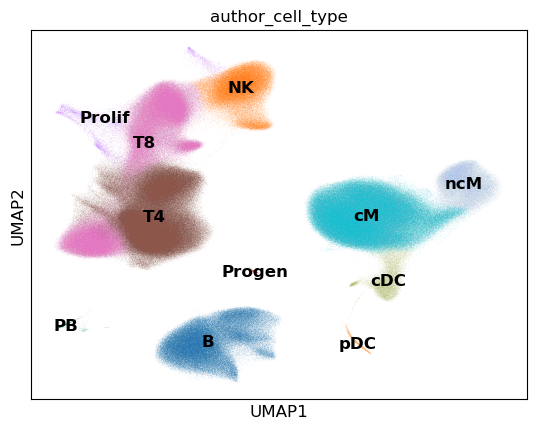

In [8]:
# UMAP
sc.pl.umap(adata, color="author_cell_type", legend_loc="on data")

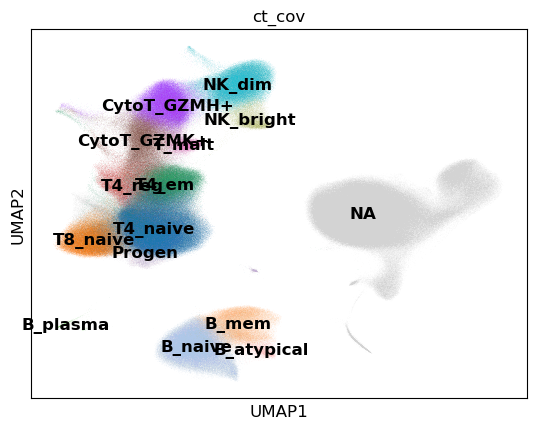

In [9]:
sc.pl.umap(adata, color="ct_cov", legend_loc="on data")

I will now isolate lupus patients only.

In [11]:
# Format the subjectid to match ind_cov
my_ind_cov = set([f"{i}_{i}" for i in donor_id["subjectid"]])

adata_lupus = adata[adata.obs["ind_cov"].isin(my_ind_cov),:].copy()
adata_lupus

AnnData object with n_obs × n_vars = 597112 × 30933
    obs: 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'cell_state', 'author_cluster', 'sample_uuid', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'disease_state', 'suspension_enriched_cell_types', 'suspension_uuid', 'suspension_type', 'donor_uuid', 'ethnicity_ontology_term_id', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Processing_Cohort', 'ct_cov', 'ind_cov', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'ethnicity', 'development_stage'
    var: 'feature_biotype', 'feature_is_filtered', 'feature_name', 'feature_reference'
    uns: 'X_normalization', 'default_embedding', 'layer_descriptions', 'schema_version', 'title', 'author_cell_type_colors', 'ct_cov_colors'
    obsm: 'X_umap'

In [13]:
adata_lupus.obs.head(10)

,library_uuid,assay_ontology_term_id,mapped_reference_annotation,is_primary_data,cell_type_ontology_term_id,author_cell_type,cell_state,author_cluster,sample_uuid,tissue_ontology_term_id,...,ct_cov,ind_cov,cell_type,assay,disease,organism,sex,tissue,ethnicity,development_stage
index,,,,,,,,,,,,,,,,,,,,,
CTAACTTCAATGAATG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0,70a004b7-4a17-4702-8910-4557aa0c4279,EFO:0009899,GENCODE 19,True,CL:0000860,cM,na,7,577bce84-8d37-4851-9fb4-53f9467699ba,UBERON:0000178,...,NaN,1132_1132,classical monocyte,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,45-year-old human stage
GGCTCGATCGTTGACA-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0,c2641f62-eb23-4dad-9c22-b52e72b79df2,EFO:0009899,GENCODE 19,True,CL:0000236,B,na,3,5e0ed28c-a75a-4ecd-a0c7-49e71264690b,UBERON:0000178,...,B_naive,1110_1110,B cell,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,71-year-old human stage
ACACCGGCACACAGAG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,222b358b-71e7-4b0f-9f9b-47b4c67aaa27,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,2,982d60b4-5677-4e2d-8b58-79503863710d,UBERON:0000178,...,NaN,1479_1479,"CD4-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,28-year-old human stage
TCGTAGATCCTTGGTC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0,0c7c125d-46d6-40ba-8088-31fb2b526a78,EFO:0009899,GENCODE 19,True,CL:0000625,T8,na,4,fc11ebf7-2767-4d92-96f9-a57af8f1be30,UBERON:0000178,...,CytoT_GZMH+,1334_1334,"CD8-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,52-year-old human stage
CCACCTAAGGGCTTCC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0,0955850b-157b-4396-a3da-83b8bcbed172,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,15,d1272c4d-f68a-4d3d-bae3-715e337bd80b,UBERON:0000178,...,T4_naive,1333_1333,"CD4-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,64-year-old human stage
GTCACGGAGATTACCC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0,272dbb99-7929-46e2-8446-a19c21af05da,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,1,2512ead7-e6f3-4ceb-9894-46e1e71eb8df,UBERON:0000178,...,NaN,1368_1368,"CD4-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,male,blood,European,45-year-old human stage
TGACAACAGAATTCCC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,8627b3d4-c529-45b3-bf1e-0313791be91d,EFO:0009899,GENCODE 19,True,CL:0000623,NK,na,6,8ac7e282-b60a-4595-9904-8a46773e2c31,UBERON:0000178,...,NK_dim,1197_1197,natural killer cell,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,42-year-old human stage
ATTTCTGAGGAACTGC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0,fb1e97d1-dd9c-4314-aae2-9c3745df1411,EFO:0009899,GENCODE 19,True,CL:0000623,NK,na,6,9e51b938-f3a9-4d97-8802-b820ed2a6b96,UBERON:0000178,...,NK_dim,1078_1078,natural killer cell,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,51-year-old human stage
CTTGGCTTCTGGCGTG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,8321fef1-a067-4a62-a461-37e1f1b4f868,EFO:0009899,GENCODE 

In [14]:
# Add subjectid to adata
adata_lupus.obs["subjectid"] = [s.split("_")[1] for s in adata_lupus.obs["ind_cov"]]
adata_lupus.obs.head()

,library_uuid,assay_ontology_term_id,mapped_reference_annotation,is_primary_data,cell_type_ontology_term_id,author_cell_type,cell_state,author_cluster,sample_uuid,tissue_ontology_term_id,...,ind_cov,cell_type,assay,disease,organism,sex,tissue,ethnicity,development_stage,subjectid
index,,,,,,,,,,,,,,,,,,,,,
CTAACTTCAATGAATG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0,70a004b7-4a17-4702-8910-4557aa0c4279,EFO:0009899,GENCODE 19,True,CL:0000860,cM,na,7,577bce84-8d37-4851-9fb4-53f9467699ba,UBERON:0000178,...,1132_1132,classical monocyte,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,45-year-old human stage,1132
GGCTCGATCGTTGACA-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0,c2641f62-eb23-4dad-9c22-b52e72b79df2,EFO:0009899,GENCODE 19,True,CL:0000236,B,na,3,5e0ed28c-a75a-4ecd-a0c7-49e71264690b,UBERON:0000178,...,1110_1110,B cell,10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,European,71-year-old human stage,1110
ACACCGGCACACAGAG-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,222b358b-71e7-4b0f-9f9b-47b4c67aaa27,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,2,982d60b4-5677-4e2d-8b58-79503863710d,UBERON:0000178,...,1479_1479,"CD4-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,28-year-old human stage,1479
TCGTAGATCCTTGGTC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-0-0-0-0-0-0,0c7c125d-46d6-40ba-8088-31fb2b526a78,EFO:0009899,GENCODE 19,True,CL:0000625,T8,na,4,fc11ebf7-2767-4d92-96f9-a57af8f1be30,UBERON:0000178,...,1334_1334,"CD8-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,52-year-old human stage,1334
CCACCTAAGGGCTTCC-1-1-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0,0955850b-157b-4396-a3da-83b8bcbed172,EFO:0009899,GENCODE 19,True,CL:0000624,T4,na,15,d1272c4d-f68a-4d3d-bae3-715e337bd80b,UBERON:0000178,...,1333_1333,"CD4-positive, alpha-beta T cell",10x 3' v2,systemic lupus erythematosus,Homo sapiens,female,blood,Asian,64-year-old human stage,1333


In [15]:
adata_lupus.write(
    "/home/lab/Van/20220715_CLUES_lupus/objects/"
    + "Ye_lab_annotated_cellxgene_lupus_only.h5ad"
)